# CNN Multi-class

# Import Packages

In [1]:
# Base Packages
import os
import time
import random
import zipfile

# EDA packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics as sklearn_metrics

# Tensorflow & Keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [2]:
tf.__version__

'2.12.0'

# Load Data

## Download Data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-07-08 12:58:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 142.251.175.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 23s     

2023-07-08 12:58:33 (21.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## Unzip Data

In [4]:
zip_ref = zipfile.ZipFile('./10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

## A walk with the data

In [5]:
for dirpath, dirnames, filenames in os.walk('./10_food_classes_all_data/'):
  print(f'Current Path {dirpath} ----- No. of directories {len(dirnames)} ----- No. of files {len(filenames)}')

Current Path ./10_food_classes_all_data/ ----- No. of directories 2 ----- No. of files 0
Current Path ./10_food_classes_all_data/train ----- No. of directories 10 ----- No. of files 0
Current Path ./10_food_classes_all_data/train/ramen ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/chicken_wings ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/pizza ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/grilled_salmon ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/steak ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/chicken_curry ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/ice_cream ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/sushi ----- No. of director

There are 10 classes and it is a balanced dataset

In [6]:
food_classes = os.listdir('./10_food_classes_all_data/train')

# Viz Data

In [7]:
DATA_DIR = '10_food_classes_all_data'
TRAIN_DIR = f'{DATA_DIR}/train'
TEST_DIR = f'{DATA_DIR}/test'

In [8]:
def render_random_image(data_path, title):

    random_image = random.sample(os.listdir(data_path), 1)[0]
    random_image_path = mpimg.imread(data_path+random_image)
    plt.imshow(random_image_path)
    plt.title(title)
    plt.axis('off')
    return random_image_path

chicken_wings


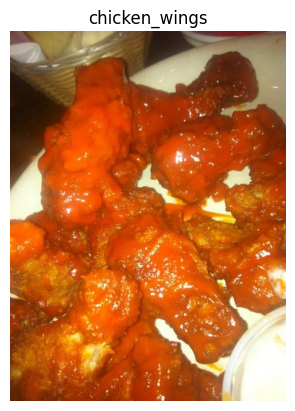

In [9]:
rand_choice = random.choice(food_classes)
render_random_image(f'{TRAIN_DIR}/{rand_choice}/', rand_choice)
print(rand_choice)

# Pre-process Data


In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load Data
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               subset='training',
                                               class_mode='categorical')

# Load Data
valid_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               subset='validation',
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# CNN Model

## Base Model

In [17]:
def build_cnn_model(layers, optimizer='adam',
                    loss=keras.losses.categorical_crossentropy, metrics=['accuracy']):

  model = keras.Sequential(layers)
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  return model

In [18]:
base_model = build_cnn_model([
    keras.layers.Input((224, 224, 3)),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),

    keras.layers.Flatten(),

    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [19]:
history_1 = base_model.fit(train_data,
                           epochs=5,
                           validation_data=valid_data)

Epoch 1/5
188/188 [==============================] - 45s 225ms/step - loss: 2.1940 - accuracy: 0.1902 - val_loss: 2.0896 - val_accuracy: 0.2527
Epoch 2/5
188/188 [==============================] - 40s 212ms/step - loss: 1.8738 - accuracy: 0.3432 - val_loss: 2.0185 - val_accuracy: 0.2980
Epoch 3/5
188/188 [==============================] - 42s 223ms/step - loss: 1.2493 - accuracy: 0.5892 - val_loss: 2.2843 - val_accuracy: 0.2793
Epoch 4/5
188/188 [==============================] - 54s 288ms/step - loss: 0.4661 - accuracy: 0.8557 - val_loss: 3.5131 - val_accuracy: 0.2320
Epoch 5/5
188/188 [==============================] - 44s 232ms/step - loss: 0.1244 - accuracy: 0.9680 - val_loss: 5.2505 - val_accuracy: 0.2387


In [20]:
def plot_train_val_acc_loss(hist):

    plt.plot(hist.epoch, hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.epoch, hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(hist.epoch, hist.history['loss'], label='Training Loss')
    plt.plot(hist.epoch, hist.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()


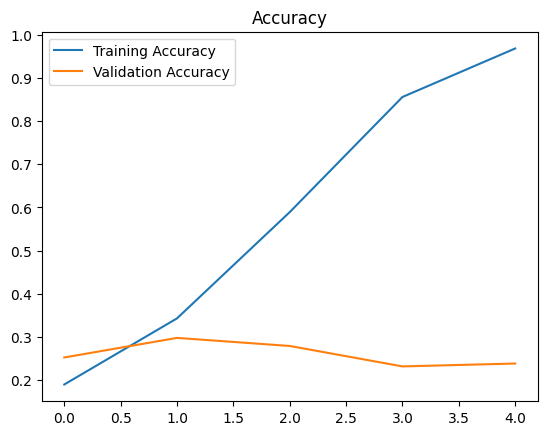

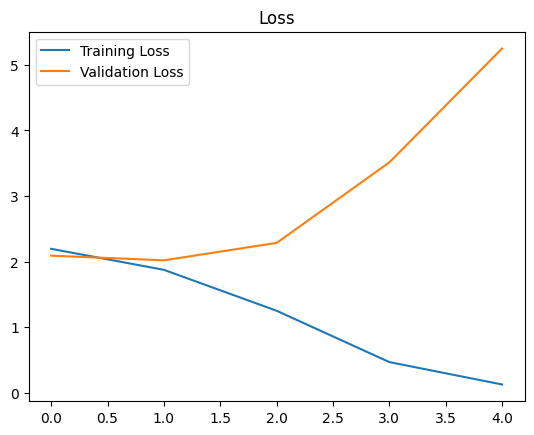

In [21]:
plot_train_val_acc_loss(history_1)

### Evaluate Base Model

In [22]:
base_model.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 5.4472 - accuracy: 0.2248


[5.447241306304932, 0.2248000055551529]

## Ways to improve Model/Reduce Overfitting

### From Data Aspect

- Get More data
  - Gives a model more chance to learn patterns b/w samples
- Data Augmentation
  - Increase the diversity of training dataset without collecting more data
- Better Data
  - Removing poor samples or adding better samples
- Transfer Learning
  - Take a model's pre-learned patterns from one problem and tweak them to suit our problem

### From Model Aspect

- Increase/Decrease hidden layers
- Choosing learning rate/optimizer/loss
- Adding Regularization Layers like Dropout


## Mode v2

- Adding MaxPool layers
- Increasing hidden units
- Adding Dropout layers

### Train Model

In [27]:
model_v2 = build_cnn_model(layers=[

    keras.layers.Input((224, 224, 3)),

    keras.layers.Conv2D(16, 3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),

    keras.layers.Conv2D(32, 3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),

    keras.layers.Conv2D(64, 3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [28]:
history_2 = model_v2.fit(train_data,
             epochs=5,
             validation_data=valid_data)

Epoch 1/5
188/188 [==============================] - 41s 206ms/step - loss: 2.2111 - accuracy: 0.1878 - val_loss: 2.0348 - val_accuracy: 0.2940
Epoch 2/5
188/188 [==============================] - 38s 201ms/step - loss: 1.9808 - accuracy: 0.2962 - val_loss: 1.9018 - val_accuracy: 0.3347
Epoch 3/5
188/188 [==============================] - 42s 222ms/step - loss: 1.7979 - accuracy: 0.3745 - val_loss: 1.9039 - val_accuracy: 0.3733
Epoch 4/5
188/188 [==============================] - 39s 206ms/step - loss: 1.5335 - accuracy: 0.4657 - val_loss: 1.9478 - val_accuracy: 0.3573
Epoch 5/5
188/188 [==============================] - 38s 200ms/step - loss: 1.1230 - accuracy: 0.6195 - val_loss: 2.1018 - val_accuracy: 0.3340


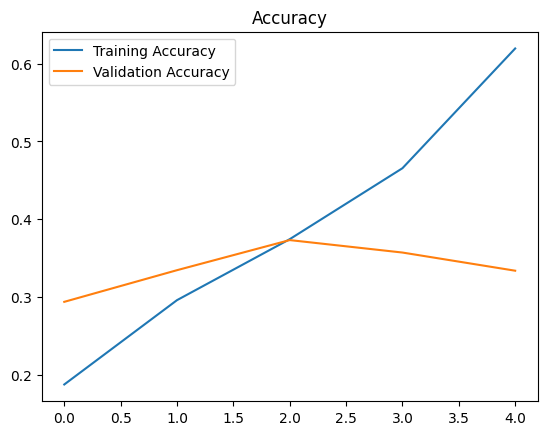

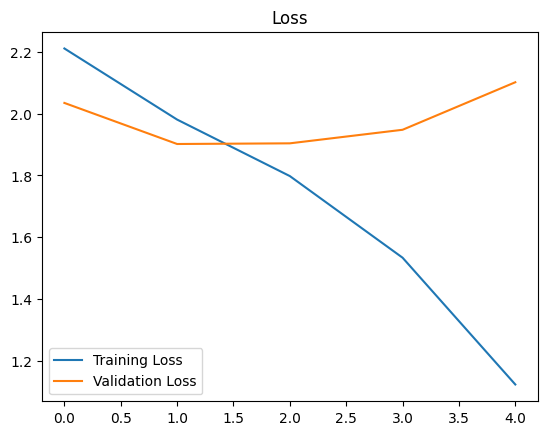

In [29]:
plot_train_val_acc_loss(history_2)

### Evaluate Model

In [30]:
model_v2.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.0110 - accuracy: 0.3600


[2.0109708309173584, 0.36000001430511475]

## Model v3

- Same as Model v2
- Data Augmentation is introduced

### Data Augmentation

In [31]:
# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load Data
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               subset='training',
                                               class_mode='categorical')

# Load Data
valid_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               subset='validation',
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Train Model

In [36]:
model_v3 = keras.models.clone_model(model_v2)
model_v3.compile(optimizer='adam',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [37]:
history_3 = model_v3.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
188/188 [==============================] - 136s 712ms/step - loss: 2.2587 - accuracy: 0.1567 - val_loss: 2.1522 - val_accuracy: 0.2207
Epoch 2/5
188/188 [==============================] - 110s 586ms/step - loss: 2.1218 - accuracy: 0.2340 - val_loss: 2.1183 - val_accuracy: 0.2280
Epoch 3/5
188/188 [==============================] - 107s 572ms/step - loss: 2.0484 - accuracy: 0.2650 - val_loss: 2.0451 - val_accuracy: 0.2747
Epoch 4/5
188/188 [==============================] - 108s 577ms/step - loss: 1.9929 - accuracy: 0.2963 - val_loss: 1.9516 - val_accuracy: 0.3067
Epoch 5/5
188/188 [==============================] - 110s 582ms/step - loss: 1.9298 - accuracy: 0.3203 - val_loss: 1.8847 - val_accuracy: 0.3393


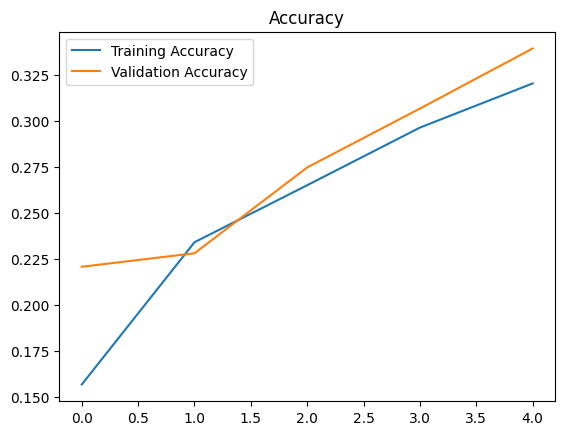

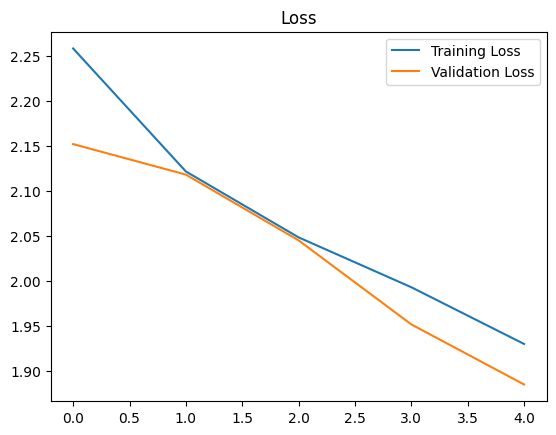

In [38]:
plot_train_val_acc_loss(history_3)

### Evaluate Model

In [41]:
model_v3.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 1.7585 - accuracy: 0.4020


[1.758502721786499, 0.4020000100135803]

## Save Model

In [43]:
model_v3.save('cnn_aug_model.h5')

## Load Model

In [44]:
loaded_model = keras.models.load_model('cnn_aug_model.h5')

### Evaluate Loaded Model

In [45]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 1.7585 - accuracy: 0.4020


[1.7585029602050781, 0.4020000100135803]

# Summary

- Model V3 has performed better than the rest of the model
  - By avoid overfitting as the training & validation loss have a descending trend
  - Increasing the number of epochs can even get into a better accuracy
  - Similarly Test dataset accuracy also has improved slightly
- Eventhough we've improved in each successive models we're not able to reach a par level of accuracy
- Hence, we need to make use of models which are pre-trained on large image dataset and fine tune it for our use-case by transfer learning